<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/25_Sen_2024_home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import re
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.feature_selection import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.pipeline import *
from sklearn.compose import *
from sklearn.impute import *
from sklearn.base import *

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df[df['Cabin'].notna()].head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
X = df.drop(['Survived', 'PassengerId', 'Name'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.drop(columns=numerical_cols).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    # ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True))

])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ]
)
model = LogisticRegression()

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])
cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_score = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print('Mean CV Accuracy:', np.mean(cv_accuracy))
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Mean CV Accuracy: 0.8159460258051808
Accuracy: 0.8324022346368715
F1 Score: 0.7857142857142857
Precision: 0.8333333333333334
Recall: 0.7432432432432432


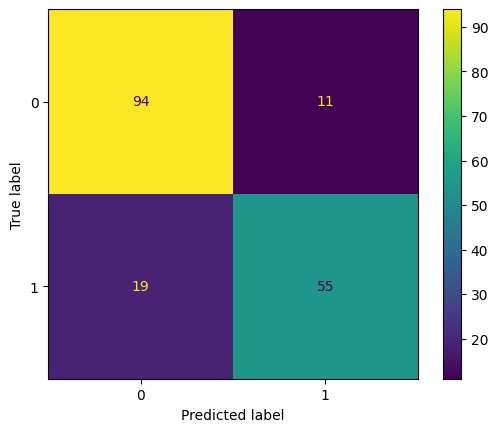

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

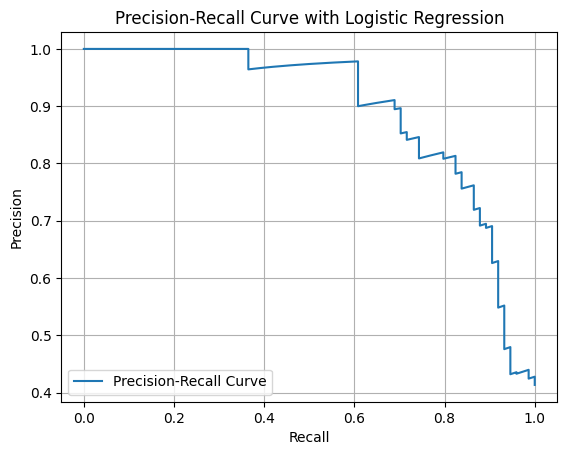

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Logistic Regression')
plt.grid()
plt.legend()
plt.show()

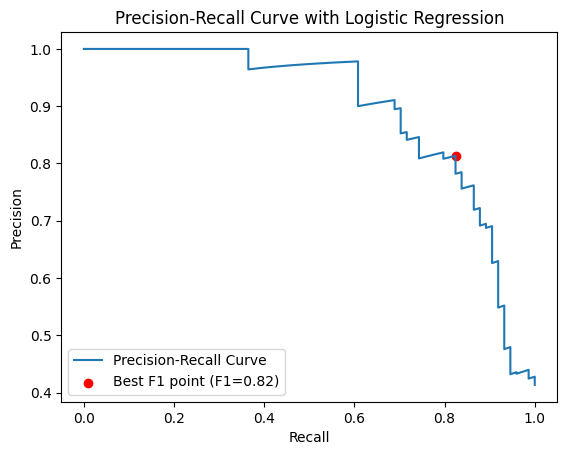

In [ ]:
f1_scores = 2 * (precision * recall) / (precision + recall)

best_index = f1_scores.argmax()
best_index

best_threshold = thresholds[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.scatter(recall[best_index], precision[best_index], color='red', label=f'Best F1 point (F1={f1_scores[best_index]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Logistic Regression')
plt.legend()
plt.show()

In [ ]:
print(f"Best Threshold: {best_threshold}")
print(f"Best Precision: {best_precision}")
print(f"Best Recall: {best_recall}")
print(f"Best F1 Score: {f1_scores[best_index]}")

Best Threshold: 0.3783464014116038
Best Precision: 0.8133333333333334
Best Recall: 0.8243243243243243
Best F1 Score: 0.8187919463087249


In [ ]:
X = df.drop(['Survived', 'PassengerId', 'Name'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.drop(columns=numerical_cols).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    # ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True))

])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ]
)
model = LogisticRegression()

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])
cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

y_score = model.predict_proba(X_test)[:, 1]

y_pred_treshhold = (y_score >= best_threshold).astype(int)

In [ ]:
f1_scores = 2 * (precision * recall) / (precision + recall)
recall = recall_score(y_test, y_pred_treshhold)
precision = precision_score(y_test, y_pred_treshhold)
accuracy = accuracy_score(y_test, y_pred_treshhold)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_scores[best_index]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8491620111731844
F1 Score: 0.8187919463087249
Precision: 0.8133333333333334
Recall: 0.8243243243243243
